In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time

from PIL import Image

In [16]:
# Open the image and show it in grayscale mode

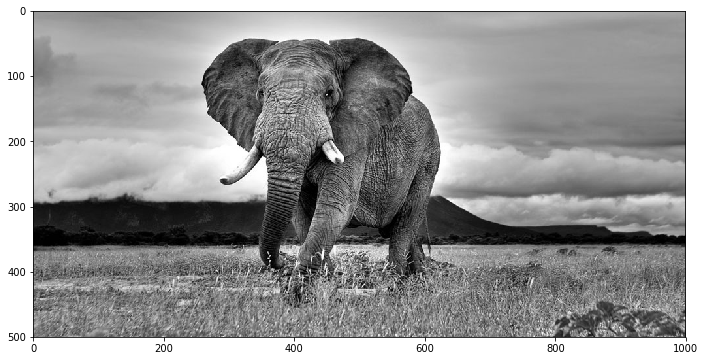

In [17]:
img = Image.open('test_image.jpg')

imggray = img.convert('LA')
plt.figure(figsize=(12, 6))
plt.imshow(imggray)

In [18]:
# Convert image to the numpy matrix and print it in the grayscale mode

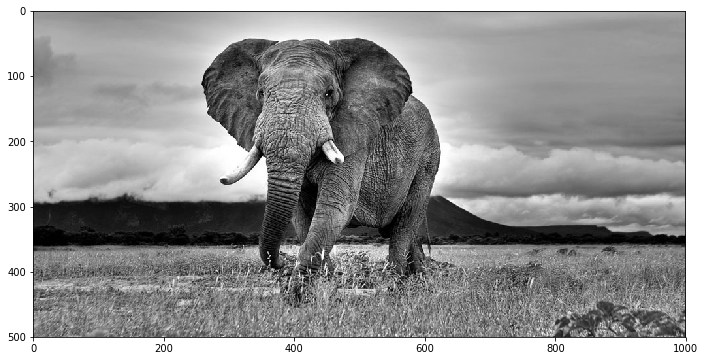

In [24]:
imgmat = np.array(list(imggray.getdata(band=0)), float)
imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)


plt.figure(figsize=(12,6))
plt.imshow(imgmat, cmap='gray');

In [20]:
print("Image size: ", imgmat.shape)

import svd_algo.svd as svd
import svd_algo.ssvd as ssvd

X = ssvd.svd_shuffle(np.array(imgmat, dtype='float64'), block_size=16)
U, sigma, V = svd.svd(X)

V = V.T

Image size:  (500, 1000)


/home/andrew/ImageCompression/svd_algo/svd.py:11: ComplexWarning: Casting complex values to real discards the imaginary part
  sigma[i, i] = evalues[i]**0.5


(496, 992)
(500, 1000)


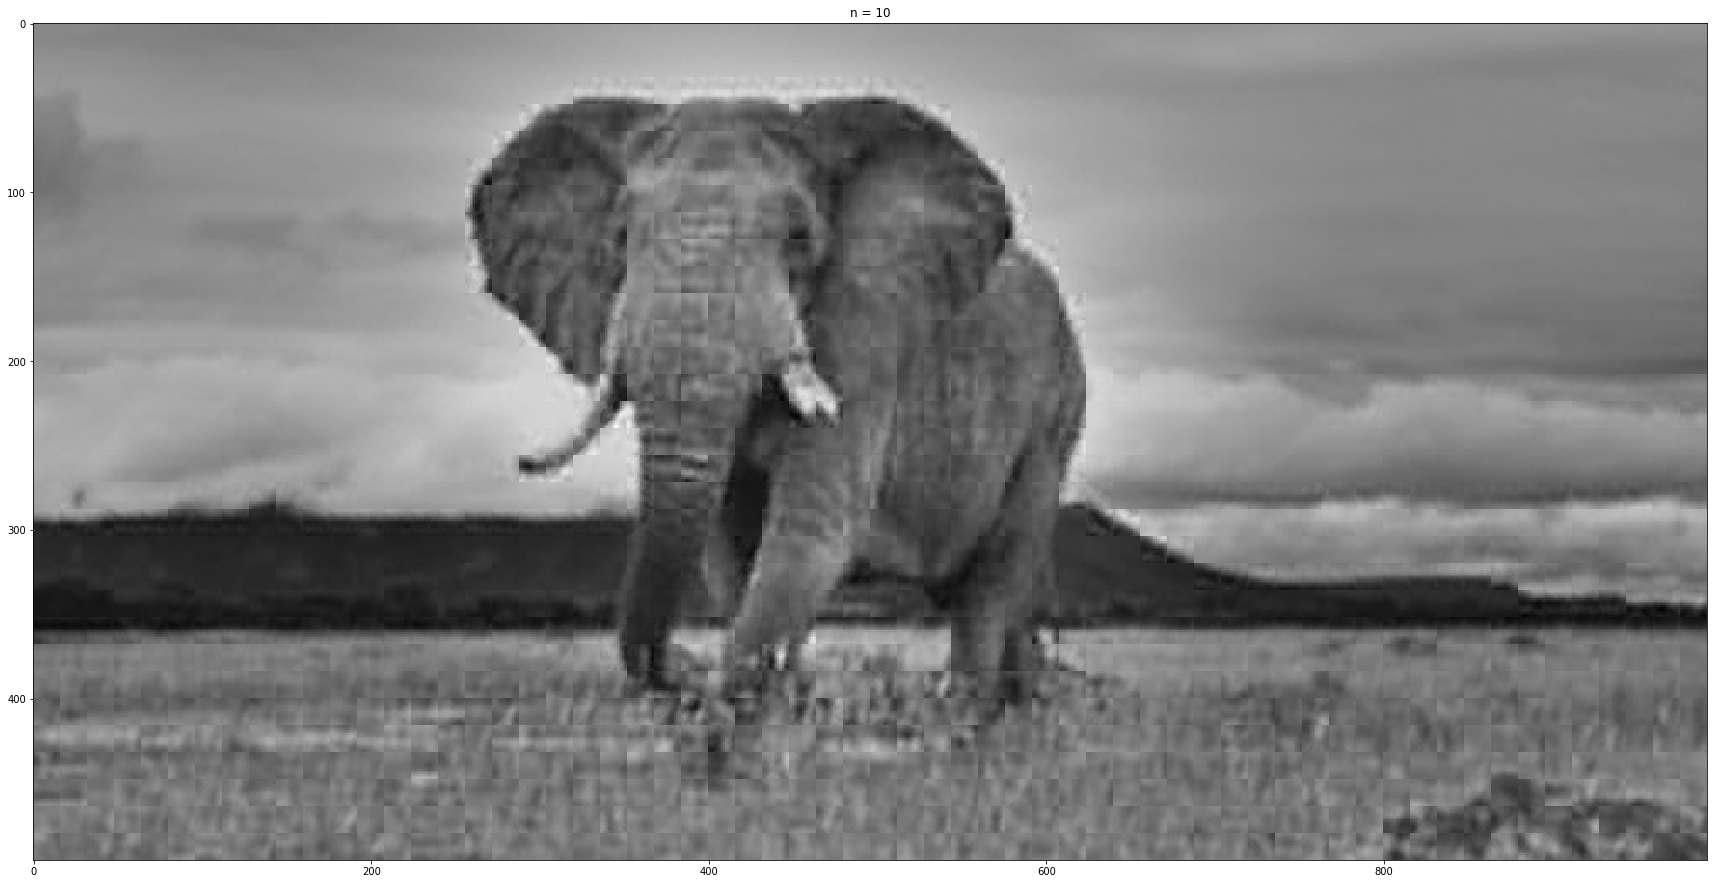

(496, 992)
(500, 1000)


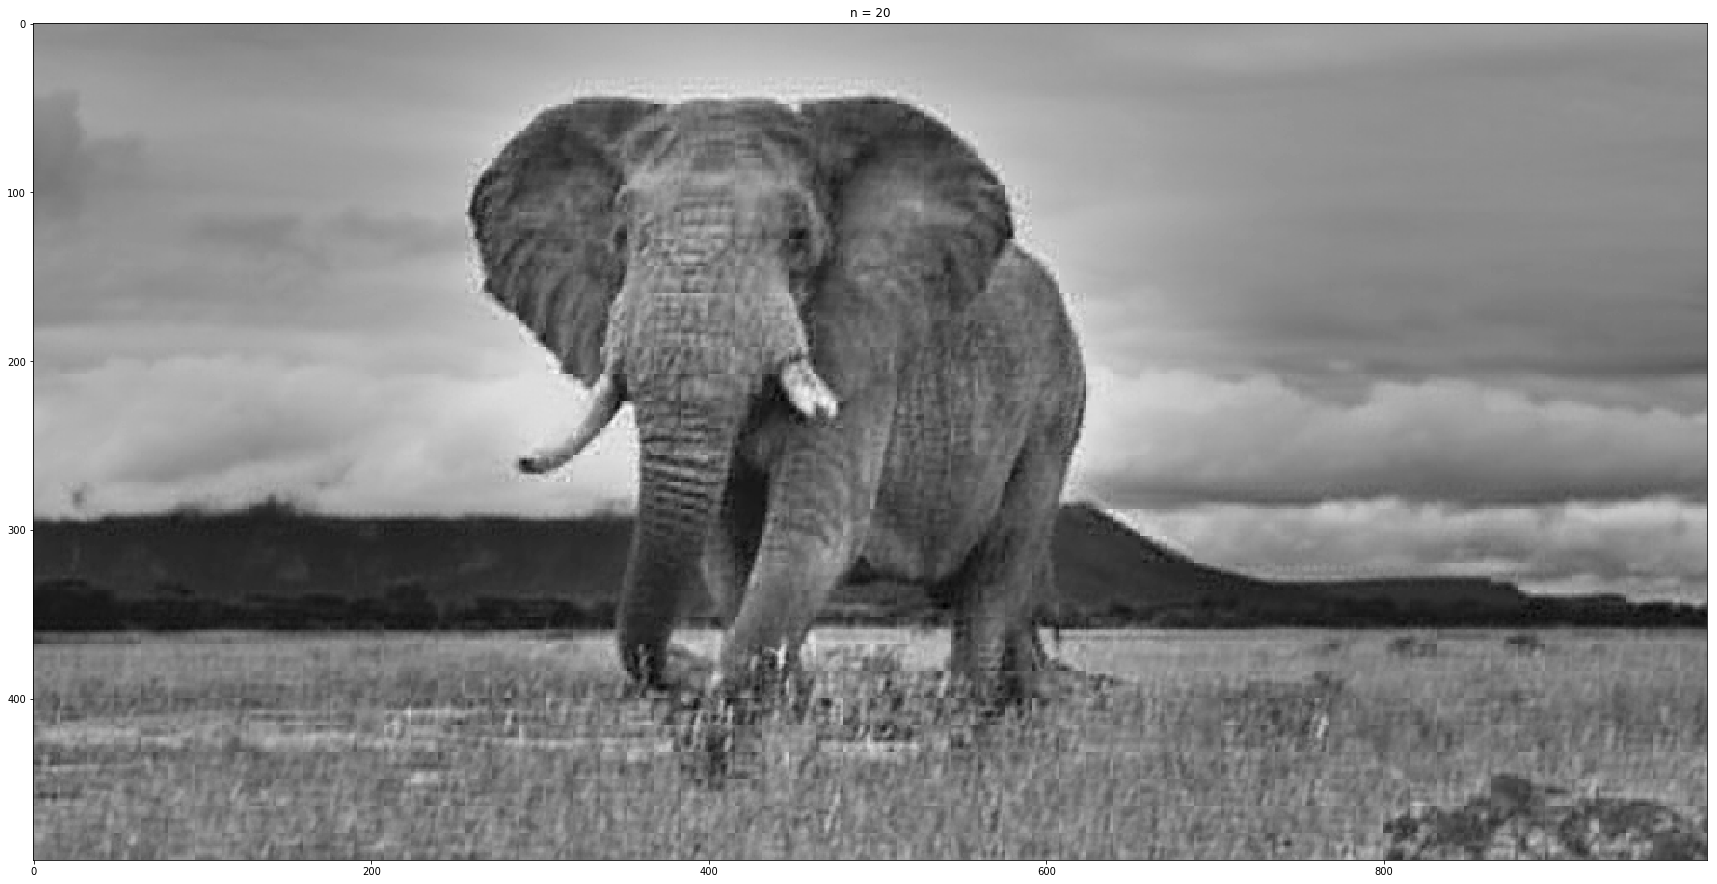

(496, 992)
(500, 1000)


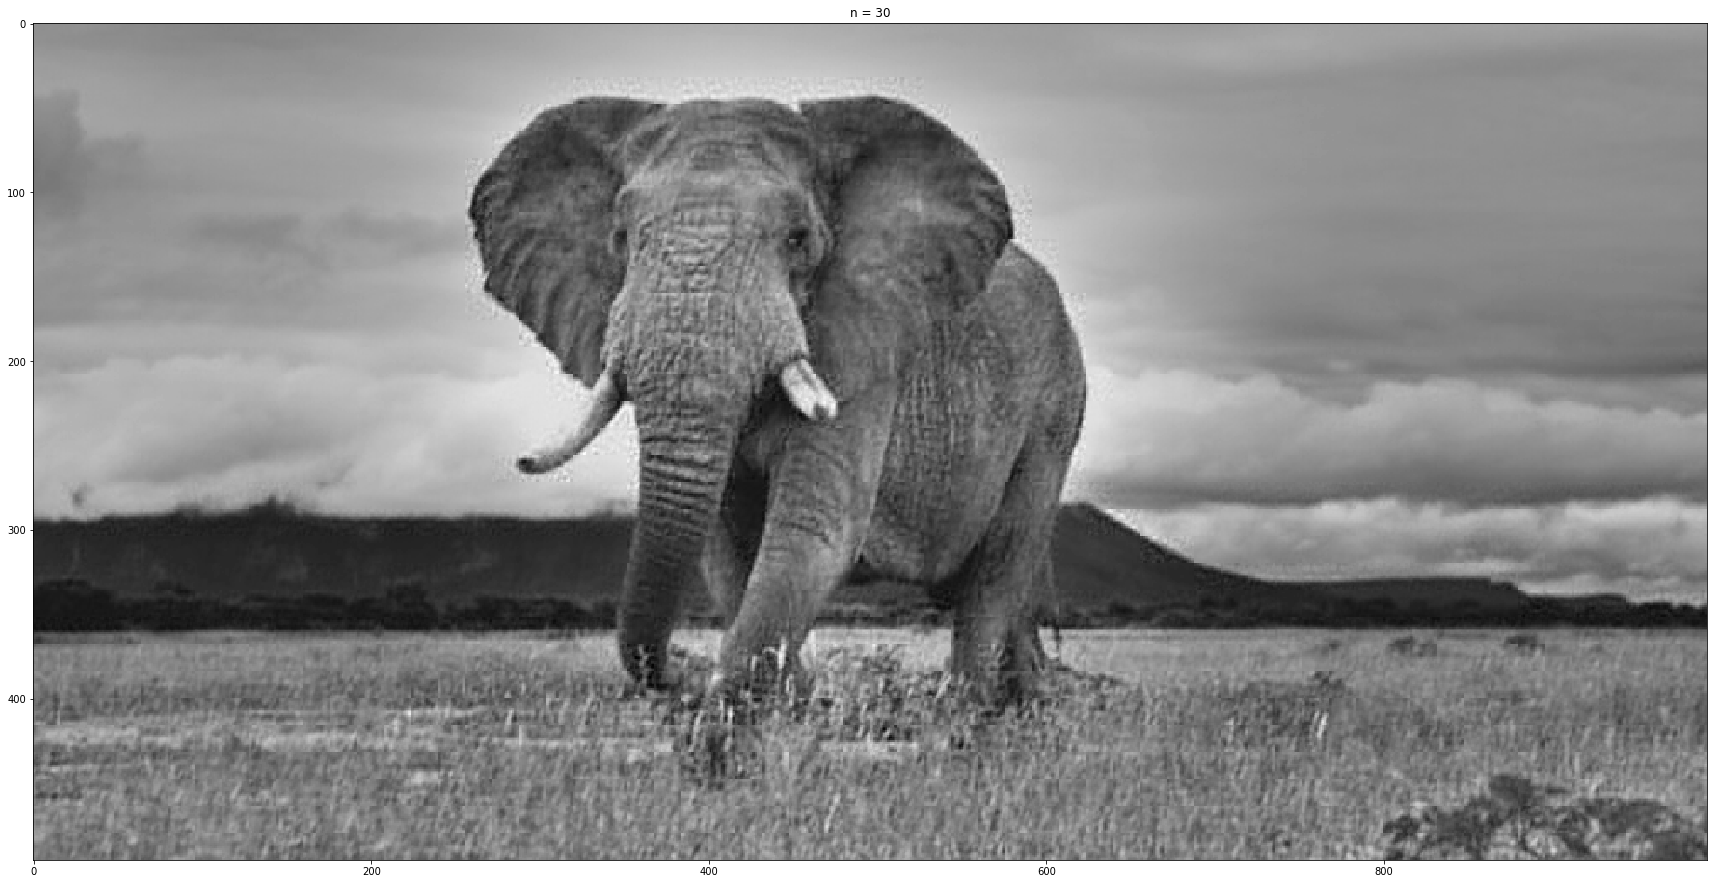

(496, 992)
(500, 1000)


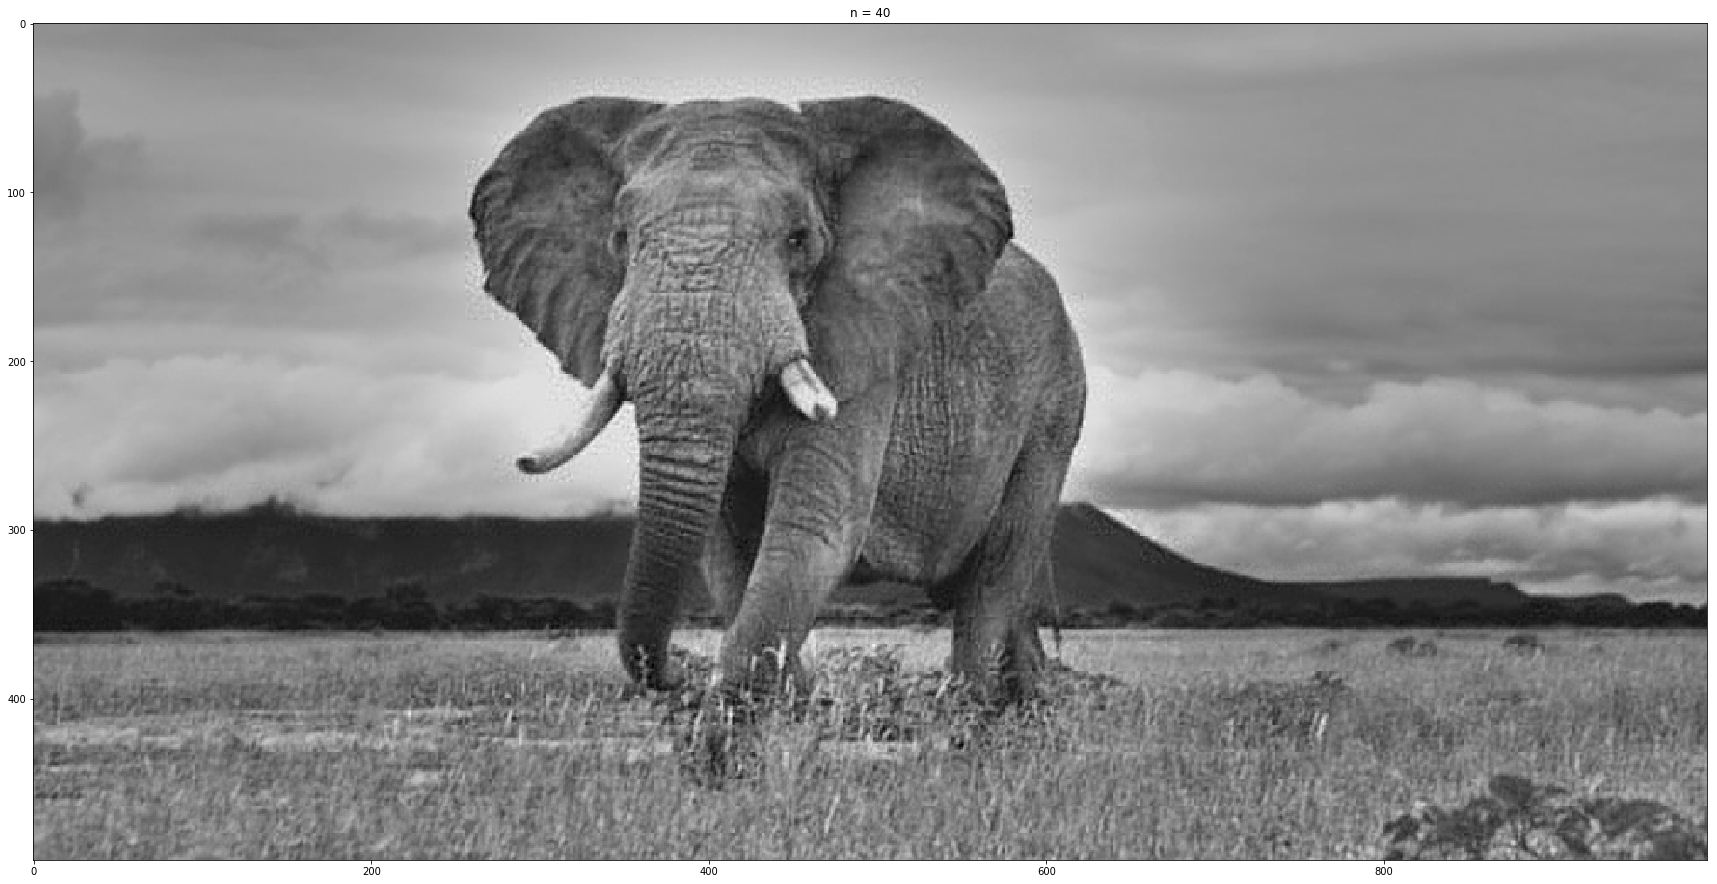

(496, 992)
(500, 1000)


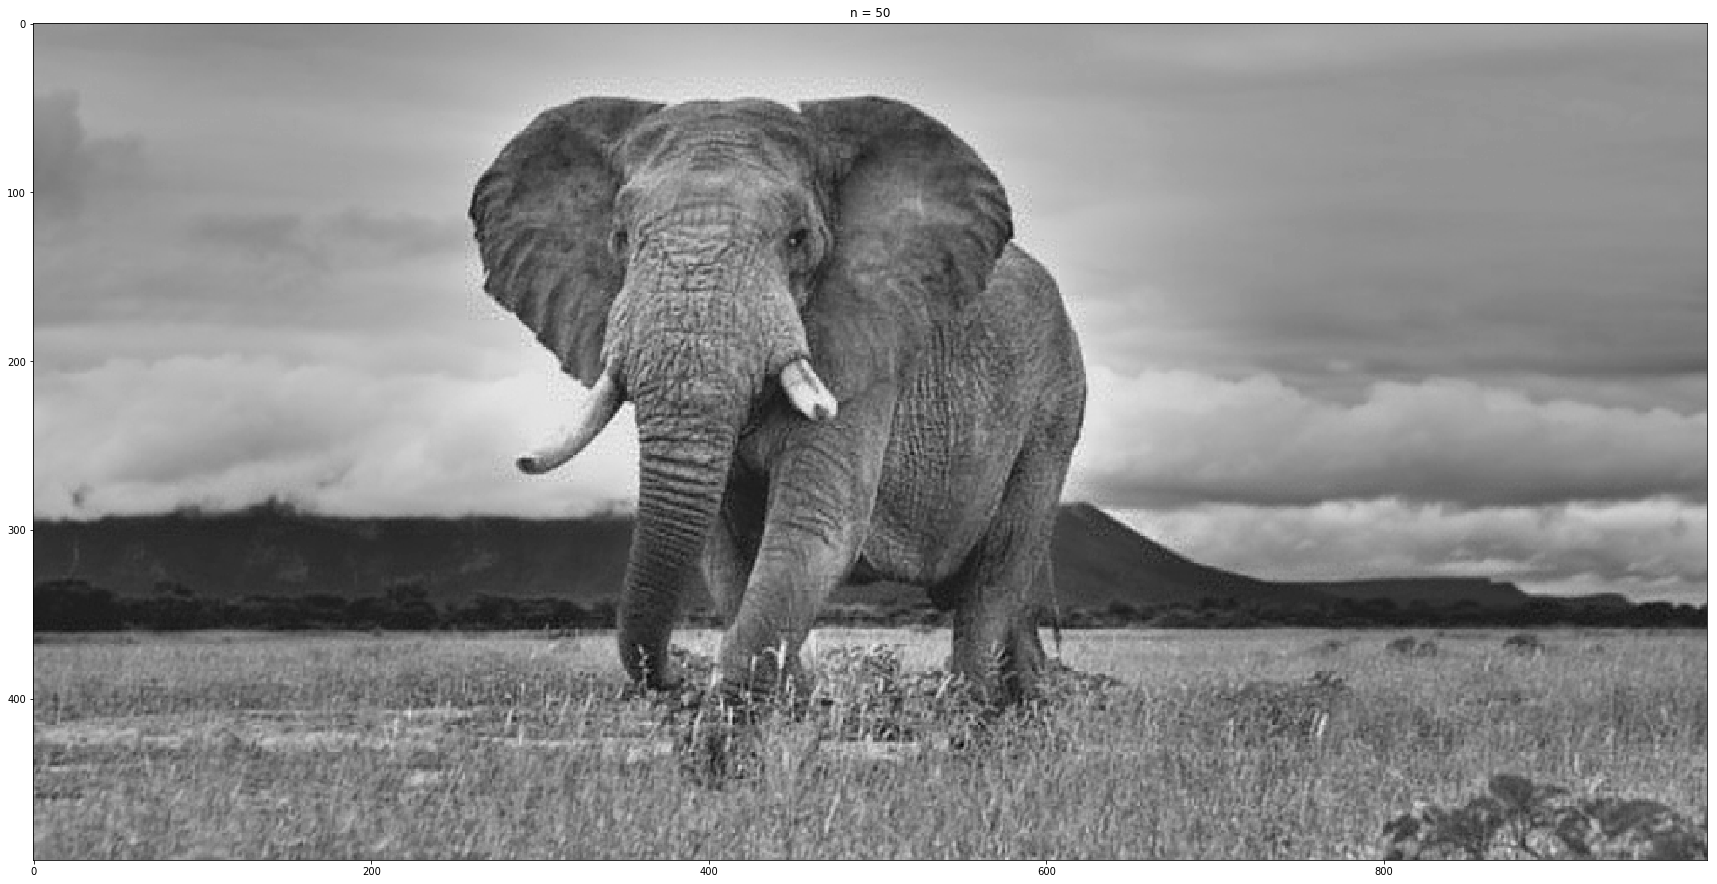

(496, 992)
(500, 1000)


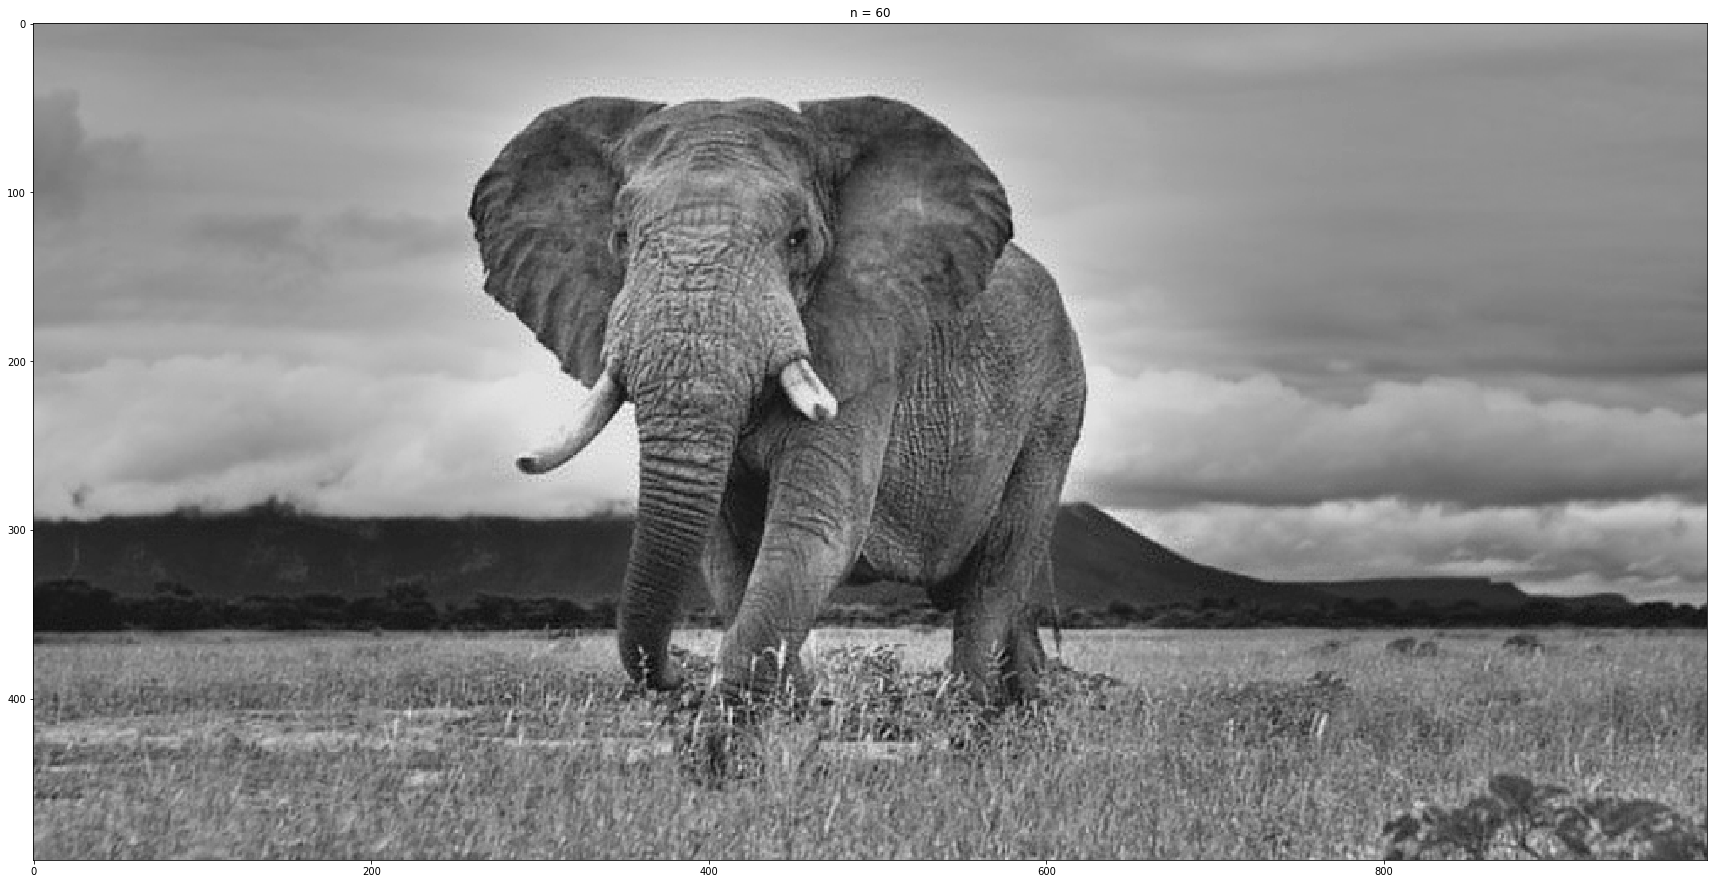

(496, 992)
(500, 1000)


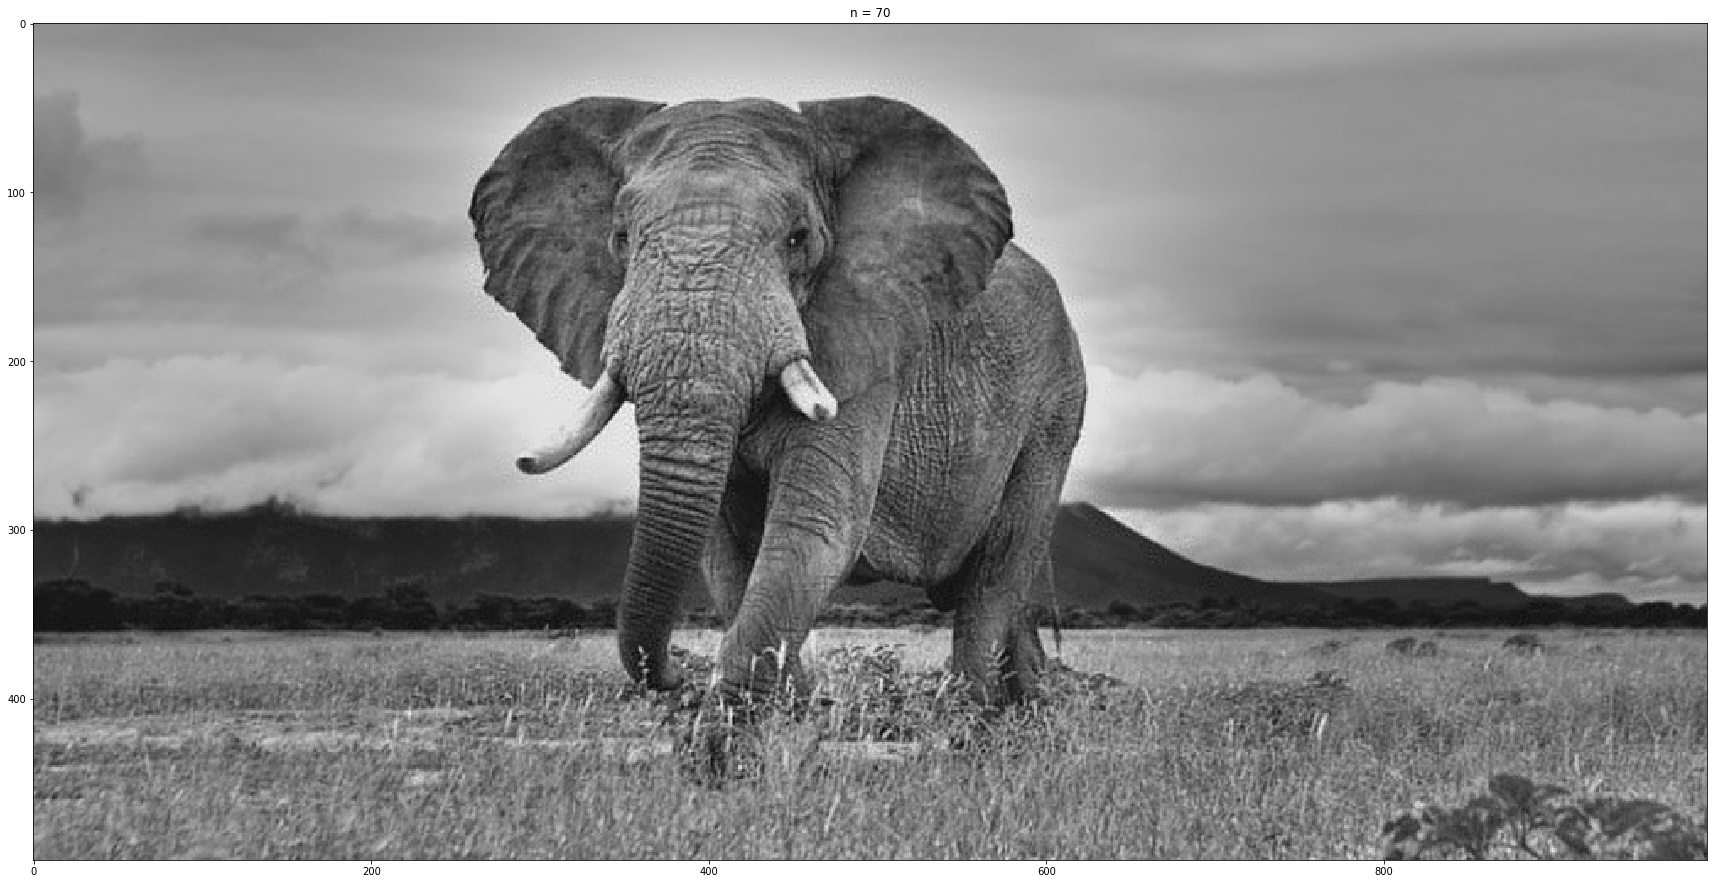

(496, 992)
(500, 1000)


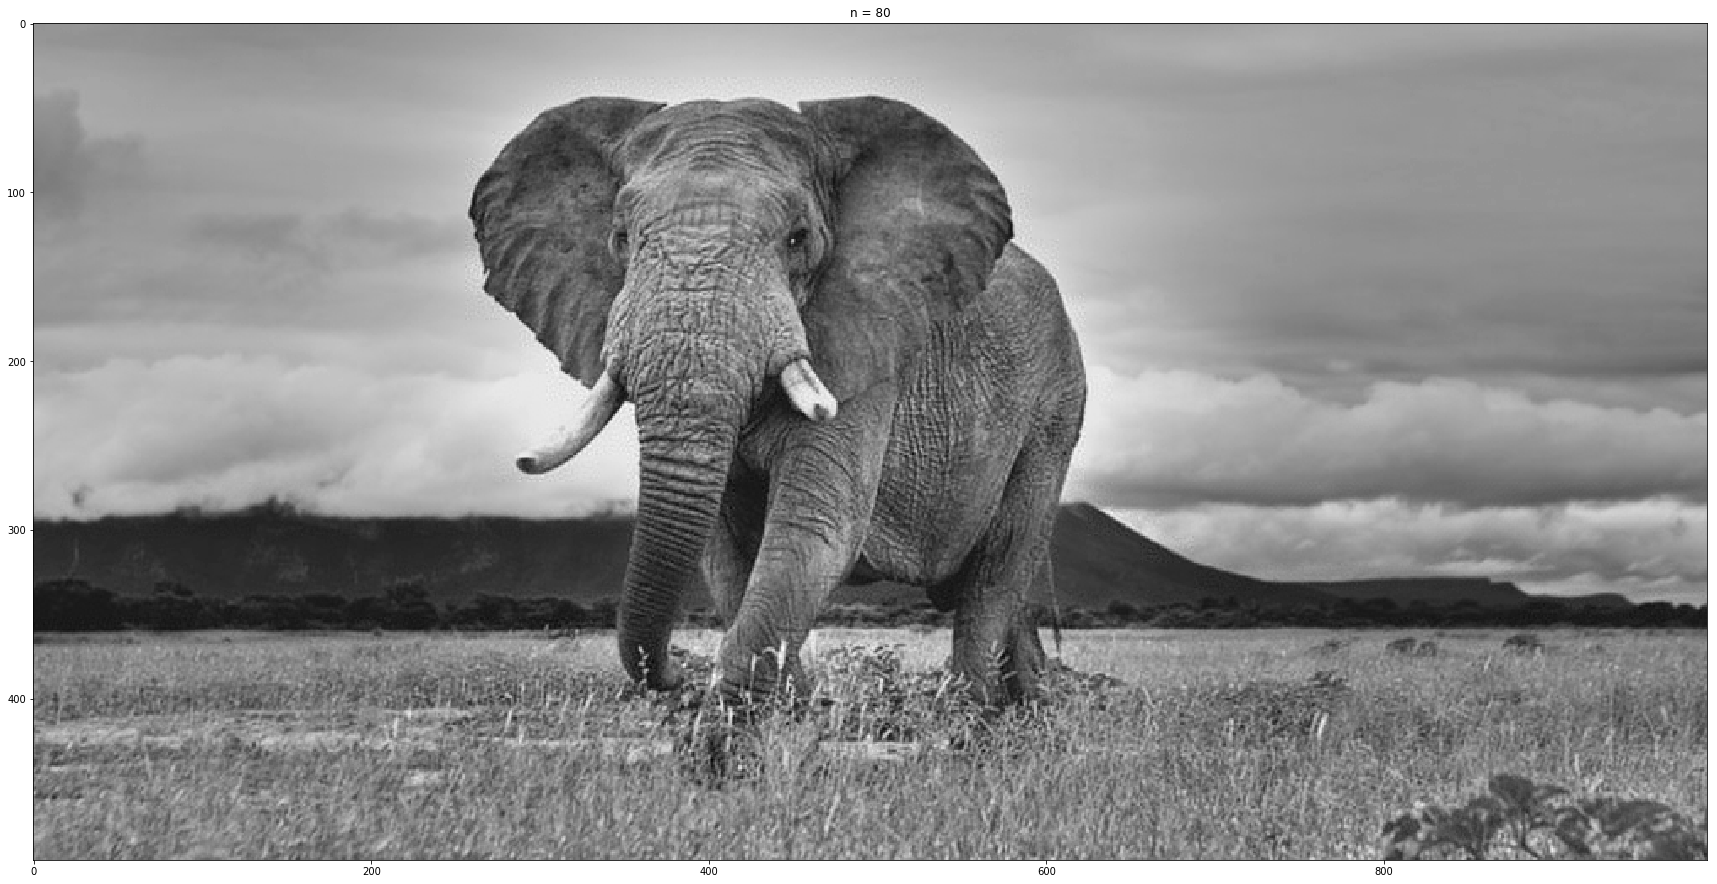

(496, 992)
(500, 1000)


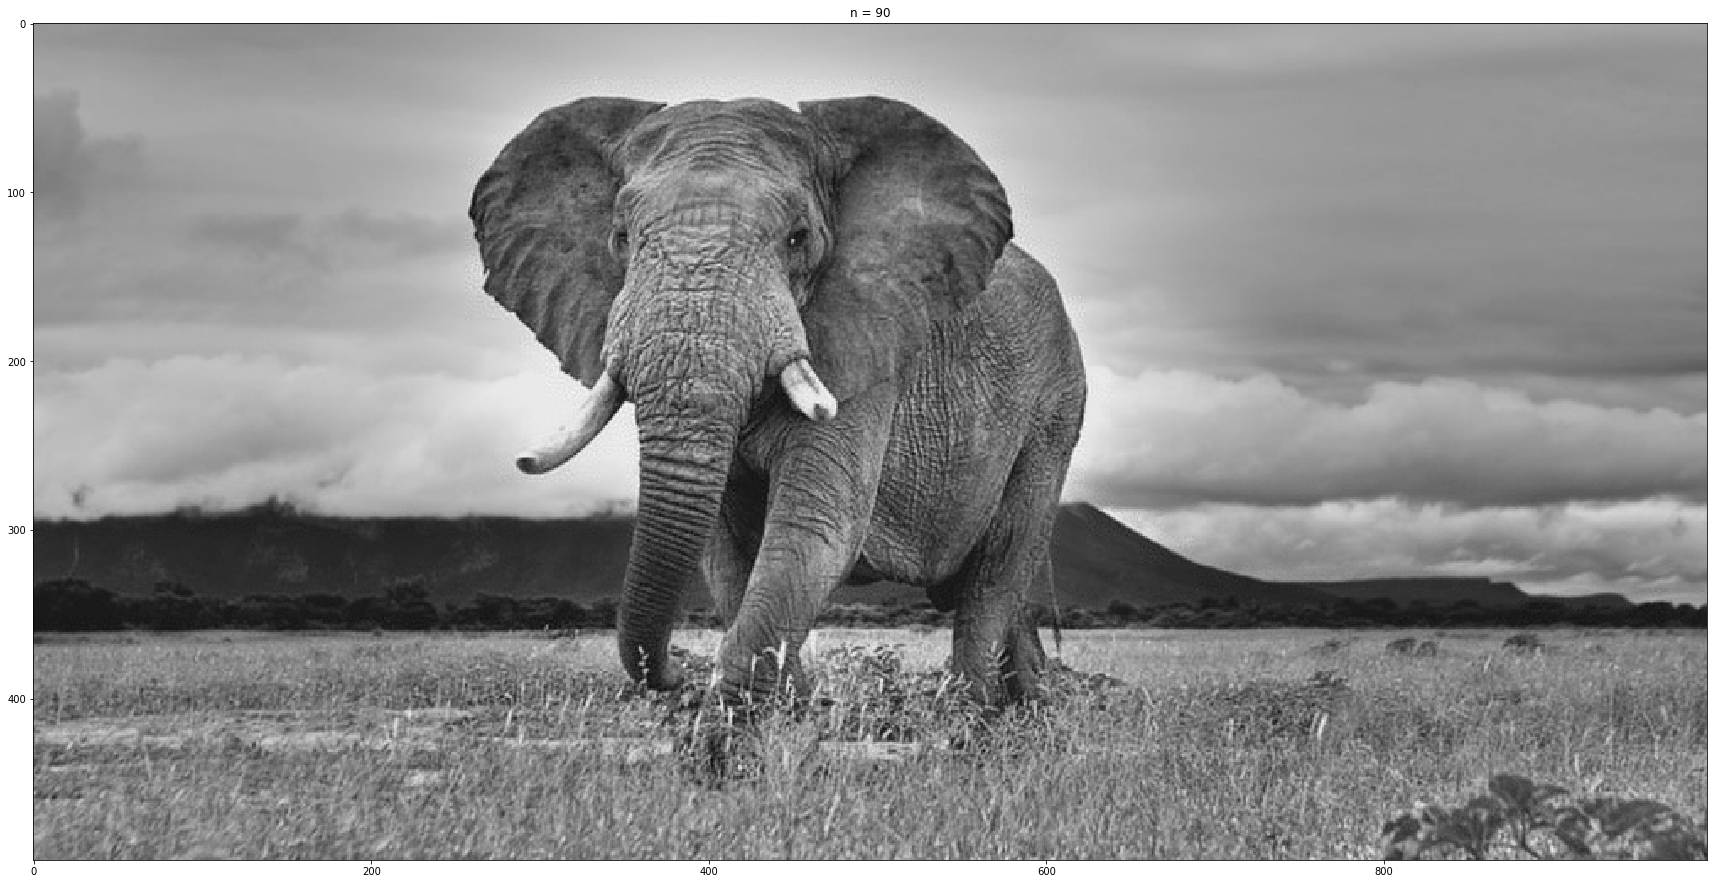

In [21]:
for i in range(10, 100, 10):
    a = np.matrix(U[:, :i])
    b = sigma[:i]
    b = b[:i, :i]
    c = np.matrix(V[:i, :])

    reconstimg = np.matrix(a * b * c, dtype='float64')

    img = ssvd.svd_unshuffle(reconstimg, imgmat.shape, 16)
    print(img.shape)
    print(imgmat.shape)

    plt.figure(figsize=(30,90))
    plt.imshow(img, cmap='gray');
    title = "n = %s" % i
    plt.title(title)
    plt.show()